<a href="https://colab.research.google.com/github/nkarachisaridis/Neural_Network/blob/main/%CE%91%CE%BD%CF%84%CE%AF%CE%B3%CF%81%CE%B1%CF%86%CE%BF_neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # 1. Install Dependencies and Setup

In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 19 kB/s 
     |████████████████████████████████| 578.1 MB 7.9 kB/s 
     |███████████████████▎            | 348.8 MB 1.5 MB/s eta 0:02:36ERROR: Exception:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/urllib3/response.py", line 438, in _error_catcher
    yield
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/urllib3/response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/cachecontrol/filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "/usr/lib/python3.8/http/client.py", line 459, in read
    n = self.readinto(b)
  File "/usr/lib/python3.8/http/client.py", line 503, in readinto
    n = self.fp.readinto(b)
  File "/usr/lib/python3.8/socket.py", line 669, in readinto
    retur

In [ ]:
!pip list

Package                       Version
----------------------------- ----------------------
absl-py                       1.3.0
aeppl                         0.0.33
aesara                        2.7.9
aiohttp                       3.8.3
aiosignal                     1.3.1
alabaster                     0.7.12
albumentations                1.2.1
altair                        4.2.0
appdirs                       1.4.4
arviz                         0.12.1
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
async-timeout                 4.0.2
atari-py                      0.2.9
atomicwrites                  1.4.1
attrs                         22.1.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.11.0
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        5.0.1
blis                          0.7.9
bokeh                         2.3.3
branca

In [ ]:
import tensorflow as tf
import os

In [ ]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [ ]:
import cv2
import imghdr

In [ ]:
data_dir = '/content/drive/MyDrive/Ds Drive/Colab Notebooks/mixed' 

In [ ]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3.LOAD DATA

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 2000 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
data_iterator

In [ ]:
# get another batch from the iterator
batch = data_iterator.next()

In [ ]:
len(batch)

2

In [ ]:
# images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [ ]:
# CLASS 1 = tumor
# CLASS 0 = alzheimer
batch[1]

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0], dtype=int32)

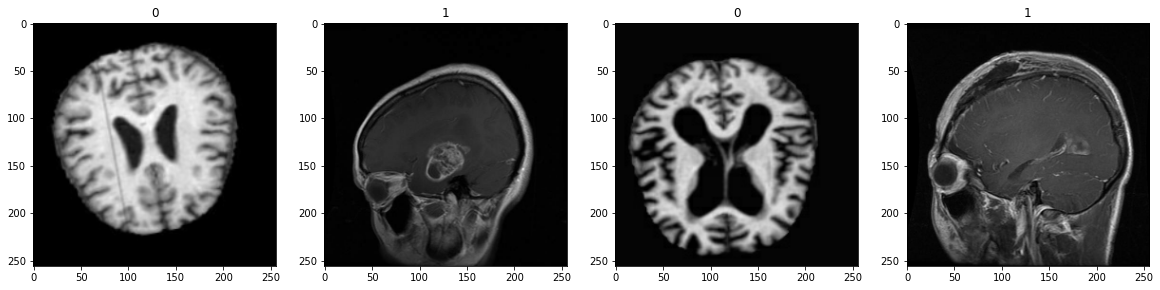

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4.SCALE DATA

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
scaled_iterator=data.as_numpy_iterator()

In [ ]:
batch = scaled_iterator.next()

In [ ]:
batch[0].max()

1.0

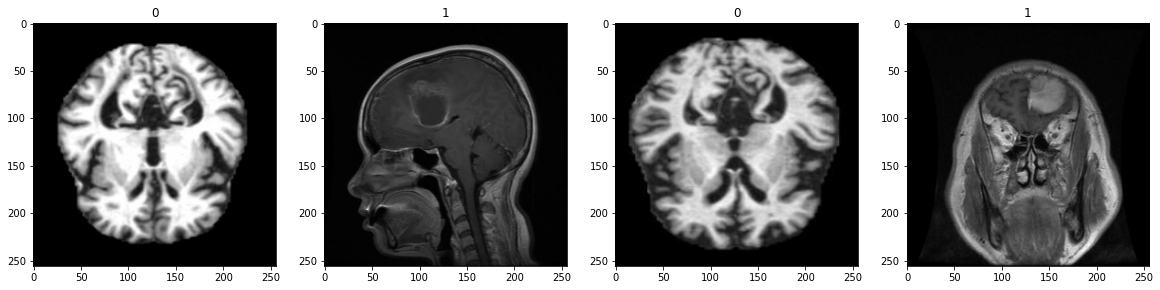

In [ ]:
fig , ax = plt.subplots(ncols=4 , figsize=(20,20))
for idx , img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

# 5. SPLIT DATA

BUILD DEEP LEARNING MODEL

In [ ]:
len(data)

63

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [ ]:
train_size + val_size + test_size

63

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. BUILD DEEP LEARNING MODEL

In [ ]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 14400)             0

# 7. TRAIN

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=3, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/3
44/44 [==============================] - 106s 2s/step - loss: 0.2300 - accuracy: 0.9105 - val_loss: 0.0142 - val_accuracy: 0.9974
Epoch 2/3
44/44 [==============================] - 95s 2s/step - loss: 0.0224 - accuracy: 0.9950 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 3/3
44/44 [==============================] - 99s 2s/step - loss: 0.0061 - accuracy: 0.9979 - val_loss: 0.0017 - val_accuracy: 1.0000


# 8. PLOT PERFORMANCE

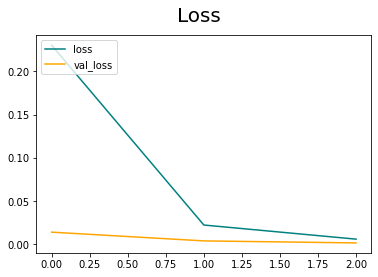

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

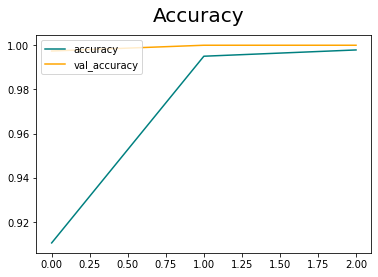

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. EVALUATION

In [ ]:
from tensorflow.python.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [ ]:
print(f'Precision:{pre.result().numpy()},Recall:{re.result().numpy()},Accuracy:{re.result().numpy()}')

Precision:1.0,Recall:1.0,Accuracy:1.0


# 10.TEST

In [ ]:
import cv2

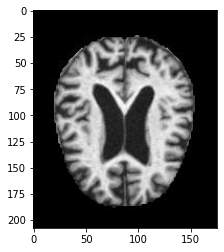

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Ds Drive/Colab Notebooks/test/27 (2).jpg')
plt.imshow(img)
plt.show()

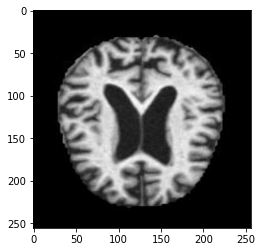

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [ ]:
yhat

array([[3.990672e-07]], dtype=float32)

In [ ]:
if yhat > 0.5: 
    print(f'Predicted class for the 1st image is Tumor')
else:
    print(f'Predicted class for the 1st image is Alzheimer')

Predicted class for the 1st image is Alzheimer


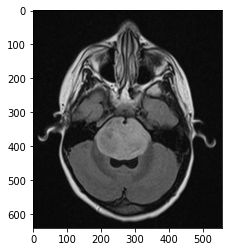

In [ ]:
img2 = cv2.imread('/content/drive/MyDrive/Ds Drive/Colab Notebooks/test/image(2).jpg')
plt.imshow(img2)
plt.show()

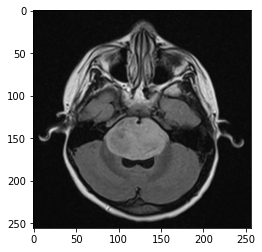

In [ ]:
resize2 = tf.image.resize(img2, (256,256))
plt.imshow(resize2.numpy().astype(int))
plt.show()

In [ ]:
yhat2 = model.predict(np.expand_dims(resize2/255, 0))

In [ ]:
yhat2

array([[0.9999997]], dtype=float32)

In [ ]:
if yhat2 > 0.5: 
    print(f'Predicted class for the 2nd image is Tumor')
else:
    print(f'Predicted class for the 2nd image is Alzheimer')

Predicted class for the 2nd image is Tumor


#11 .SAVE THE TEST 

In [74]:
image_exts2 = ['jpeg','jpg', 'bmp', 'png']
folder_dir ='/content/drive/MyDrive/Ds Drive/Colab Notebooks/Test'
test_list=[]

for images2 in os.listdir(folder_dir)  :
  image_path2 = os.path.join(folder_dir,images2)
  try: 
    img2 = cv2.imread(image_path2)
    #print(img2)
    #list with the images to be tested
    test_list.append(img2)
    tip2 = imghdr.what(image_path2)
    if tip not in image_exts2: 
        print('Image not in ext list {}'.format(image_path2))
        os.remove(image_path2)
  except Exception as e: 
    print('Issue with image {}'.format(os.path.join(folder_dir, image_path2)))
    # os.remove(image_path2)
#print(len(test_list))

24


In [79]:
def saveImage(image,id,prediction):
  if prediction > 0.5:
    address='/content/drive/MyDrive/Ds Drive/Colab Notebooks/Tested/Tested_Tumor/tumor' + str(id) +'.jpg'
    cv2.imwrite(address,image)
    print("1")
  else :
    address='/content/drive/MyDrive/Ds Drive/Colab Notebooks/Tested/Tested_Alzheimer/alzheimer'+ str(id) +'.jpg'
    cv2.imwrite(address,image)
    print("2")
  image=0
  id=0
  prediction=0


In [ ]:

#img3 =cv2.imread('/content/drive/MyDrive/Ds Drive/python/mixed/tum/5.jpg')
#saveImage(img3 ,2)
i=0

for images2 in test_list:
  plt.imshow(images2)
  plt.show()
  resize = tf.image.resize(images2, (256,256))
  yhat = model.predict(np.expand_dims(resize/255, 0))
  #print(yhat)
  saveImage(images2,i,yhat)
  i+=1
  #if yhat > 0.5: 
   # print(f'Predicted class for the image is Tumor')
  #else:
   # print(f'Predicted class for the image is Alzheimer')
  yhat=0
  resize=0
